# Trabalho de Redes Neurais

In [72]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem as al
from cod_izaque import converte
import numpy as np

## Adquirindo os dados

Os nossos dados adveêm do site `Kaggle` e fazem parte da tarefa: `Metal-Organic Frame Materials Prediction`

In [73]:
dados_treino_finger = pd.read_csv(r"C:\Users\izaque23003\Downloads\trabalho_redes_neurais\dados_treino\finger_train.csv", sep=',', header=0)
dados_treino_RAC = pd.read_csv(r"C:\Users\izaque23003\Downloads\trabalho_redes_neurais\dados_treino\RAC_train.csv", sep=',', header=0)
dados_teste_RAC = pd.read_csv(r"C:\Users\izaque23003\Downloads\trabalho_redes_neurais\dados_teste\RAC_test.csv", sep=',', header=0)
dados_teste_finger = pd.read_csv(r"C:\Users\izaque23003\Downloads\trabalho_redes_neurais\dados_teste\finger_test.csv", sep=',', header=0)

In [74]:
#dados_treino_finger.to_excel('dados_treino_finger.xlsx', index=False)
#dados_treino_RAC.to_excel('dados_treino_RAC.xlsx', index=False)

In [75]:
dados_treino_finger

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,4d,5d,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time
0,WIRMOB_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0
1,VIXTUT_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,c1cc(CCc2ccncc2)ccn1,2,85,72.0
2,PODKUQ_clean,2,2,2,1,0,0,0,6,6,...,0,0,0,0,0,Cu,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0
3,IKUTOZ_clean,2,2,2,2,2,2,0,6,6,...,10,0,0,10,0,Dy,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0
4,LADHEF_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,c1nnc[nH]1,2,80,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,132,2,2,2,2,2,0,0,6,6,...,2,0,0,0,0,Zr,[O]c1c(c2ccc(cc2)C(=O)[O-])c2ccc3c4c2c(c1c1ccc...,4,120,72.0
556,57,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,[O-]C(=O)C1=C[C]=CC(=C1)C(=O)[O-],2,75,96.0
557,58,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Fe,[O-]C(=O)C1=CC2=C3C=C(C=C3c3c([C]2S1)sc(c3)C(=...,3,120,120.0
558,26,2,2,2,2,2,2,2,6,6,...,10,10,2,14,0,Th,[O-]C(=O)C1=[C][C]=C([C]=[C]1)C(=O)[O-],4,120,24.0


In [76]:
dados_treino_RAC

,mof,ASA [m^2/cm^3],CellV [A^3],Df,Di,Dif,NASA [m^2/cm^3],POAV [cm^3/g],POAVF,PONAV [cm^3/g],...,solvent1,solvent2,solvent3,additive,param1,param2,param3,param4,param5,additive_category
0,QUHMOX_clean,0.00,2449.58,3.20914,4.58402,4.58402,143.541,0.000000,0.00000,0.036248,...,679,0,0,284,0.189590,0.332505,-0.110283,-0.350300,0.586608,2
1,VOLPET_clean,2359.68,4070.64,6.24705,9.30216,9.30149,0.000,0.934072,0.69306,0.000000,...,6228,6342,0,0,0.054899,0.332505,0.389717,-0.020010,-0.059007,1
2,XUHVON_clean,0.00,2499.00,3.20904,4.66393,4.65334,603.909,0.000000,0.00000,0.297950,...,702,0,0,0,0.191143,0.332505,0.889717,0.040564,-0.304783,1
3,KIDDOS_clean,0.00,4315.92,3.52628,5.19880,5.19880,707.042,0.000000,0.00000,0.218235,...,6228,0,0,0,0.073993,0.332505,-0.110283,-0.089079,0.295377,1
4,FURFOP_clean,0.00,2316.27,3.56519,4.93892,4.93892,685.582,0.000000,0.00000,0.212321,...,31374,0,0,0,0.210237,0.332505,0.389717,-0.027583,0.044372,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,MAYKOO_clean,1918.59,11245.60,11.50288,12.58218,12.56968,0.000,1.157320,0.69822,0.000000,...,962,31275,6228,313,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,2
533,ADASEF_clean,1817.36,40224.70,10.92309,21.62414,17.61491,0.000,1.883260,0.82036,0.000000,...,6228,0,0,0,0.073993,0.332505,-0.110283,-0.089079,0.295377,1
534,KUQWIE_clean,0.00,2393.79,3.51453,4.08788,4.08434,128.677,0.000000,0.00000,0.047668,...,962,0,0,3301,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,0
535,WONBAD_clean,1727.14,2107.04,4.23427,5.26924,4.80256,0.000,0.252112,0.47918,0.000000,...,6228,0,0,0,0.073993,0.332505,-0.110283,-0.089079,0.295377,1


## Verificando o tipo de dado no DataFrame

In [77]:
dados_treino_finger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mof              560 non-null    object 
 1   1s               560 non-null    int64  
 2   2s               560 non-null    int64  
 3   3s               560 non-null    int64  
 4   4s               560 non-null    int64  
 5   5s               560 non-null    int64  
 6   6s               560 non-null    int64  
 7   7s               560 non-null    int64  
 8   2p               560 non-null    int64  
 9   3p               560 non-null    int64  
 10  4p               560 non-null    int64  
 11  5p               560 non-null    int64  
 12  6p               560 non-null    int64  
 13  3d               560 non-null    int64  
 14  4d               560 non-null    int64  
 15  5d               560 non-null    int64  
 16  6d               560 non-null    int64  
 17  4f              

In [78]:
dados_treino_RAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 354 entries, mof to additive_category
dtypes: float64(260), int64(93), object(1)
memory usage: 1.5+ MB


In [79]:
dados_teste_finger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mof              140 non-null    int64 
 1   1s               140 non-null    int64 
 2   2s               140 non-null    int64 
 3   3s               140 non-null    int64 
 4   4s               140 non-null    int64 
 5   5s               140 non-null    int64 
 6   6s               140 non-null    int64 
 7   7s               140 non-null    int64 
 8   2p               140 non-null    int64 
 9   3p               140 non-null    int64 
 10  4p               140 non-null    int64 
 11  5p               140 non-null    int64 
 12  6p               140 non-null    int64 
 13  3d               140 non-null    int64 
 14  4d               140 non-null    int64 
 15  5d               140 non-null    int64 
 16  6d               140 non-null    int64 
 17  4f               140 non-null    in

In [80]:
dados_teste_RAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Columns: 342 entries, mof to CH4HPSTP
dtypes: float64(255), int64(87)
memory usage: 358.2 KB


### Encontrando os dados `object` e convertendo

In [81]:
dados_treino_finger.select_dtypes(include='object')

,mof,metal,linker1smi
0,WIRMOB_clean,Zn,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...
1,VIXTUT_clean,Zn,c1cc(CCc2ccncc2)ccn1
2,PODKUQ_clean,Cu,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...
3,IKUTOZ_clean,Dy,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12
4,LADHEF_clean,Zn,c1nnc[nH]1
...,...,...,...
555,132,Zr,[O]c1c(c2ccc(cc2)C(=O)[O-])c2ccc3c4c2c(c1c1ccc...
556,57,Zn,[O-]C(=O)C1=C[C]=CC(=C1)C(=O)[O-]
557,58,Fe,[O-]C(=O)C1=CC2=C3C=C(C=C3c3c([C]2S1)sc(c3)C(=...
558,26,Th,[O-]C(=O)C1=[C][C]=C([C]=[C]1)C(=O)[O-]


In [82]:
dados_treino_RAC.select_dtypes(include='object')

,mof
0,QUHMOX_clean
1,VOLPET_clean
2,XUHVON_clean
3,KIDDOS_clean
4,FURFOP_clean
...,...
532,MAYKOO_clean
533,ADASEF_clean
534,KUQWIE_clean
535,WONBAD_clean


In [83]:
dados_teste_finger.select_dtypes(include='object')

,metal,linker1smi
0,Zn,Nc1ncnc2nc[nH]c12
1,Cu,O=C(O)c1cc(C(=O)O)cc(-c2cc(-c3cc(C(=O)O)cc(C(=...
2,Mg,O=C(O)c1ccc2cc(C(=O)O)ccc2c1
3,Gd,O=C(O)c1ccc2[nH]c(-c3ccc(-c4nc5ccc(C(=O)O)cc5[...
4,Cu,O=C(O)c1cncc(C(=O)O)c1
...,...,...
135,Zr,Cc1cc(ccc1c1ccc(cc1C)C(=O)[O-])C(=O)[O-]
136,Fe,[O-]C(=O)c1ccc(cc1)N=Nc1ccc(cc1)C(=O)[O-]
137,Th,[O-]C(=O)C1=[C][C]=C([C]=[C]1)C(=O)[O-]
138,Fe,Nc1c(cc(cc1c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)...


As colunas que o pandas identifica como do tipo `object` são todas do tipo `string`. Vamos convertê-las.

In [84]:
lista = ['mof', 'metal', 'linker1smi']
for coluna in lista:
    dados_treino_finger[coluna] = converte(dados_treino_finger[coluna], 'string')
    
dados_treino_RAC[lista[0]] = converte(dados_treino_RAC[lista[0]], 'string')
lista.remove('mof')
for coluna in lista:
    dados_teste_finger[coluna] = converte(dados_teste_finger[coluna], 'string')

## Verificando presença de dados não preenchidos

In [85]:
dados_treino_finger.isnull().sum()

mof                0
1s                 0
2s                 0
3s                 0
4s                 0
5s                 0
6s                 0
7s                 0
2p                 0
3p                 0
4p                 0
5p                 0
6p                 0
3d                 0
4d                 0
5d                 0
6d                 0
4f                 0
5f                 0
metal              0
linker1smi         0
oxidation_state    0
temperature        0
time               0
dtype: int64

In [86]:
dados_treino_RAC.isnull().sum()

mof                  0
ASA [m^2/cm^3]       0
CellV [A^3]          0
Df                   0
Di                   0
                    ..
param2               0
param3               0
param4               0
param5               0
additive_category    0
Length: 354, dtype: int64

## Antes da diversão, alguns ajustes...

Para a implementação do `VIF` é necessário dados numéricos e nosso dataset possui uma mescla de dados str e dados int/float. Alguns dados str/object devem ser mantidos e para isso vamos realizar uma conversão simbólico-numérico, este é o caso do `metal`. A coluna `linker1smi` será transformada em um número com o auxílio da biblioteca `rdkit` com o módulo `Chem`.

In [87]:
lista_rac = list(dados_treino_RAC.columns)
lista_rac.remove('mof')

In [88]:
lista= list(dados_treino_finger.columns)
lista.remove('mof')

In [89]:
ordenador = set(dados_treino_finger[lista[lista.index('metal')]].values)
ordenador= list(ordenador)
treino_finger_cp = dados_treino_finger[lista]
treino_rac_cp = dados_treino_RAC[lista_rac]

In [90]:
from sklearn.preprocessing import OrdinalEncoder

def conversao_ordinal(x, ordem):
    
    encoder = OrdinalEncoder(categories=ordem)

    encoder.fit(x)

    dados_convertidos = encoder.transform(x)

    return dados_convertidos

In [91]:
x = treino_finger_cp["metal"].values.reshape(-1, 1)
ordem = [ordenador] 

treino_finger_cp['metal'] = conversao_ordinal(x, ordem)

C:\Users\izaque23003\AppData\Local\Temp\ipykernel_19756\726674928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_finger_cp['metal'] = conversao_ordinal(x, ordem)


In [92]:
treino_finger_cp

,1s,2s,3s,4s,5s,6s,7s,2p,3p,4p,...,4d,5d,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time
0,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0
1,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,c1cc(CCc2ccncc2)ccn1,2,85,72.0
2,2,2,2,1,0,0,0,6,6,0,...,0,0,0,0,0,17.0,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0
3,2,2,2,2,2,2,0,6,6,6,...,10,0,0,10,0,12.0,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0
4,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,c1nnc[nH]1,2,80,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2,2,2,2,2,0,0,6,6,6,...,2,0,0,0,0,3.0,[O]c1c(c2ccc(cc2)C(=O)[O-])c2ccc3c4c2c(c1c1ccc...,4,120,72.0
556,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,[O-]C(=O)C1=C[C]=CC(=C1)C(=O)[O-],2,75,96.0
557,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,5.0,[O-]C(=O)C1=CC2=C3C=C(C=C3c3c([C]2S1)sc(c3)C(=...,3,120,120.0
558,2,2,2,2,2,2,2,6,6,6,...,10,10,2,14,0,7.0,[O-]C(=O)C1=[C][C]=C([C]=[C]1)C(=O)[O-],4,120,24.0


In [106]:
def string_to_mol(molecula):
    
    molecule = Chem.MolFromSmiles(molecula)
    finger_molecula = al.GetMorganFingerprintAsBitVect(molecule, 2)
    binary_vector = finger_molecula.ToBitString()
    #binary_vector = hash(binary_vector)
    binary_vector = np.asmatrix(binary_vector)
    #molecule
    return binary_vector

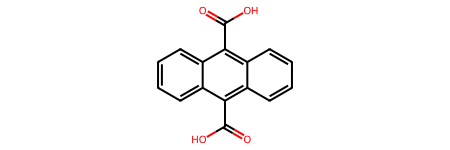

In [107]:
m = Chem.MolFromSmiles(treino_finger_cp['linker1smi'][3])
m

In [108]:
convertidos = []
for molecula in treino_finger_cp['linker1smi']:
    convertidos.append(string_to_mol(molecula))

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<unknown>, line 1)

In [70]:
#treino_finger_cp['linker1smi'] = convertidos

In [69]:
treino_finger_cp

,1s,2s,3s,4s,5s,6s,7s,2p,3p,4p,...,4d,5d,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time
0,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,0000000000000000000000000000000000000000000000...,2,110,72.0
1,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,0000000000000000000000000000000000000000000000...,2,85,72.0
2,2,2,2,1,0,0,0,6,6,0,...,0,0,0,0,0,17.0,0000000000000000000000000000000000000000000000...,2,80,24.0
3,2,2,2,2,2,2,0,6,6,6,...,10,0,0,10,0,12.0,0000000000000000000000000000000000000000000000...,3,95,24.0
4,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,0000000000000000000000000000000000000000000000...,2,80,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2,2,2,2,2,0,0,6,6,6,...,2,0,0,0,0,3.0,0000000000000000000000000000000000000000000000...,4,120,72.0
556,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,8.0,0000000000000000000000000000000000000000000000...,2,75,96.0
557,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,5.0,0000000000000000010000000000000000000000000000...,3,120,120.0
558,2,2,2,2,2,2,2,6,6,6,...,10,10,2,14,0,7.0,0000000000000000000000000000000000000000000000...,4,120,24.0


Com os valores de `linker1smi` convertidos, temos um problema. Originalmente, o método `GetMorganFingerprintAsBitVect` retornava um valor binário que continha várias informações para cada molécula. Tornar a coluna `linker1smi` um valor único foi um erro?

## Iniciando a implementação do VIF

In [36]:
from sklearn.linear_model import LinearRegression
#Créditos: Daniel Roberto Cassar
def selecao_vif(df_atributos, limiar_vif):
    """Realiza a seleção de atributos por VIF.

    Args:
      df_atributos: DataFrame contendo os atributos.
      limiar_vf: valor do limiar do vif. Número positivo. Usualmente é 5 ou 10.

    Returns:
      DataFrame com os atributos selecionados.
    """

    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)
        else:
            break

    return df

In [38]:
#from cod_izaque import selecao_fif
#VIF para dados_treino_finger
LIMIAR_VIF = 5

novo_treino_finger = selecao_vif(treino_finger_cp, LIMIAR_VIF)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [116]:
novo_treino_finger

,3s,4s,5s,6s,7s,3p,4p,5p,6p,3d,4d,5d,6d,4f,metal,linker1smi,oxidation_state,temperature,time
0,2,2,0,0,0,6,0,0,0,10,0,0,0,0,10.0,-5767155356953396688,2,110,72.0
1,2,2,0,0,0,6,0,0,0,10,0,0,0,0,10.0,6951885122863401112,2,85,72.0
2,2,1,0,0,0,6,0,0,0,10,0,0,0,0,18.0,3802322429189106232,2,80,24.0
3,2,2,2,2,0,6,6,6,0,10,10,0,0,10,6.0,-4388350798334891131,3,95,24.0
4,2,2,0,0,0,6,0,0,0,10,0,0,0,0,10.0,5824513122113383893,2,80,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2,2,2,0,0,6,6,0,0,10,2,0,0,0,8.0,8646609409602697556,4,120,72.0
556,2,2,0,0,0,6,0,0,0,10,0,0,0,0,10.0,2738221966332439437,2,75,96.0
557,2,2,0,0,0,6,0,0,0,6,0,0,0,0,5.0,-4523999196785701124,3,120,120.0
558,2,2,2,2,2,6,6,6,6,10,10,10,2,14,15.0,-413401424358470971,4,120,24.0


In [119]:
LIMIAR_VIF = 7
novo_treino_rac = selecao_vif(treino_rac_cp, LIMIAR_VIF)

KeyboardInterrupt: 